In [1]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualization
from sklearn.linear_model import LinearRegression  # For linear regression models
from scipy.stats import t  # For statistical functions
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.metrics import silhouette_score  # To evaluate clustering quality
from sklearn.preprocessing import RobustScaler  # To scale data robustly against outliers
import warnings  # To manage warnings
# Suppress warnings
warnings.filterwarnings("ignore")  # Ignore warnings to avoid clutter during output

In [3]:
# Loading the dataset
data = pd.read_csv('Superstore.csv', encoding='latin1')  
# Reads the 'Superstore.csv' file into a DataFrame.
# The 'encoding='latin1'' is specified to handle special characters in the dataset, 
# commonly used when files contain non-ASCII characters.

In [5]:
data.head()            # .head() dispalys top 5 rows to inspect the data.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Converting the 'Order Date' column to datetime format
data['Order date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')  
# The 'Order Date' column is transformed into a datetime object for easier manipulation and analysis.
# The format='%d-%m-%Y' ensures the correct parsing of dates in day-month-year format.
# A new column 'Order date' is created to store the converted values.

In [9]:
data.info()      # .info() used to provides the information of the data and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   object        
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
numeric_columns = data.select_dtypes(include=['number'])  # Selecting only numeric columns from the dataset

In [13]:
numeric_columns.describe()                               # using .describe() to see some basic stats of the data.

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Row ID,4997.500000,4997.5000,2885.163629,0.000000,-1.200000
Postal Code,55190.379428,56430.5000,32063.693350,-0.128526,-1.493020
Sales,229.858001,54.4900,623.245101,12.972752,305.311753
Quantity,3.789574,3.0000,2.225110,1.278545,1.991889
Discount,0.156203,0.2000,0.206452,1.684295,2.409546
Profit,28.656896,8.6665,234.260108,7.561432,397.188515


## 1.Heat Map

In [93]:
def plot_correlation_heatmap(data):
    '''
    Plots a correlation heatmap for numeric columns in the dataset.
    '''
    plt.figure(figsize=(8, 6), dpi=144)  # Set figure size and resolution
    correlation_matrix = data.corr()  # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot heatmap with annotations
    plt.title('Correlation Heatmap', fontsize=14)  # Add title
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()  # Display the plot

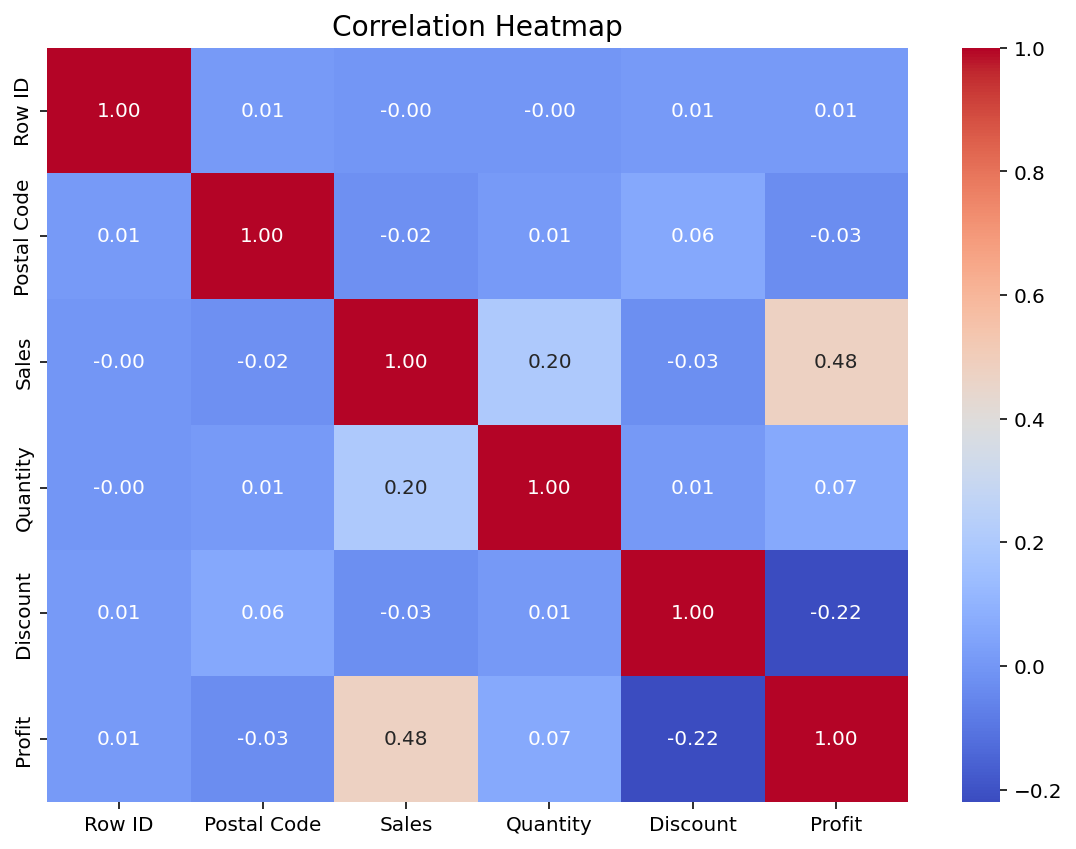

In [95]:
# visualize correlation
plot_correlation_heatmap(numeric_columns)

In [14]:
def plot_linear_fit_with_confidence_intervals(x, y):
    """
    Perform linear regression and plot the fit with confidence intervals and error bars.
    x : Independent variable,  y : Dependent variable.
    """
    # Reshape x for sklearn compatibility
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Predictions
    y_pred = model.predict(x)
    
    # Calculate confidence intervals
    n = len(y)
    mean_x = np.mean(x)
    t_val = t.ppf(1 - 0.025, df=n-2)  # 95% confidence interval
    se = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))  # Standard error of residuals
    conf_interval = t_val * se * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    
    # Reshape conf_interval if needed
    conf_interval = conf_interval.flatten()
    
    # Plot data points
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data Points', color='blue')
    
    # Plot regression line
    plt.plot(x, y_pred, color='red', label='Regression Line')
    
    # Plot confidence intervals
    plt.fill_between(x.flatten(), 
                     (y_pred - conf_interval).flatten(), 
                     (y_pred + conf_interval).flatten(), 
                     color='pink', alpha=0.3, label='Confidence Interval')
    
    # Titles and labels
    plt.title('Linear Fit with Confidence Intervals')
    plt.xlabel('Independent Variable (Sales)')
    plt.ylabel('Dependent Variable (Profit)')
    plt.legend()
    plt.grid()
    plt.show()

## 2.Linear Fit 

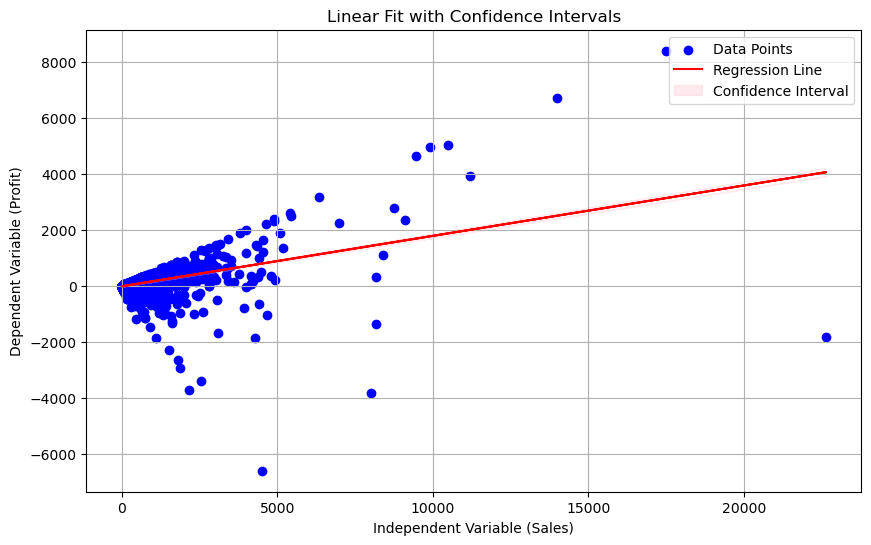

In [15]:
# Assigning Sales and Profit
x = data["Sales"]
y = data["Profit"]

# Useing the linear regression function
plot_linear_fit_with_confidence_intervals(x, y)

In [25]:
cleaned_data = data[['Sales', 'Profit', 'Category', 'Sub-Category', 'Quantity', 'Discount']]  # Selecting columns
grouped_data = cleaned_data.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
melted_data = pd.melt(grouped_data, id_vars=['Category', 'Sub-Category'], value_vars=['Sales', 'Profit'],var_name='Metric', value_name='Value')

In [43]:
def plot_grouped_sales_and_profit(data):
    '''This function generates a bar plot that visualizes the total Sales and Profit for each 
    Sub-Category, with different colors representing Sales and Profit.
    '''
    plt.figure(figsize=(12, 8),dpi=244)
    
    sns.barplot(
        data = data,
        x = 'Sub-Category',  # X-axis: Sub-Category
        y = 'Value',         # Y-axis: Sales/Profit values
        hue = 'Metric',      # Differentiate Sales and Profit by hue
        edgecolor = 'black', # Border color for bars
        palette = 'viridis'  # Color palette
    )
    
    plt.title('Sales and Profit by Sub-Category', fontsize = 16)
    plt.xlabel('Sub-Category', fontsize = 14)
    plt.ylabel('Values', fontsize = 14)
    plt.xticks(rotation = 45, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(title = 'Metric', fontsize = 12, title_fontsize = 14)

    # Optimizing layout
    plt.tight_layout()
    plt.show()

## 3.Bar Chart

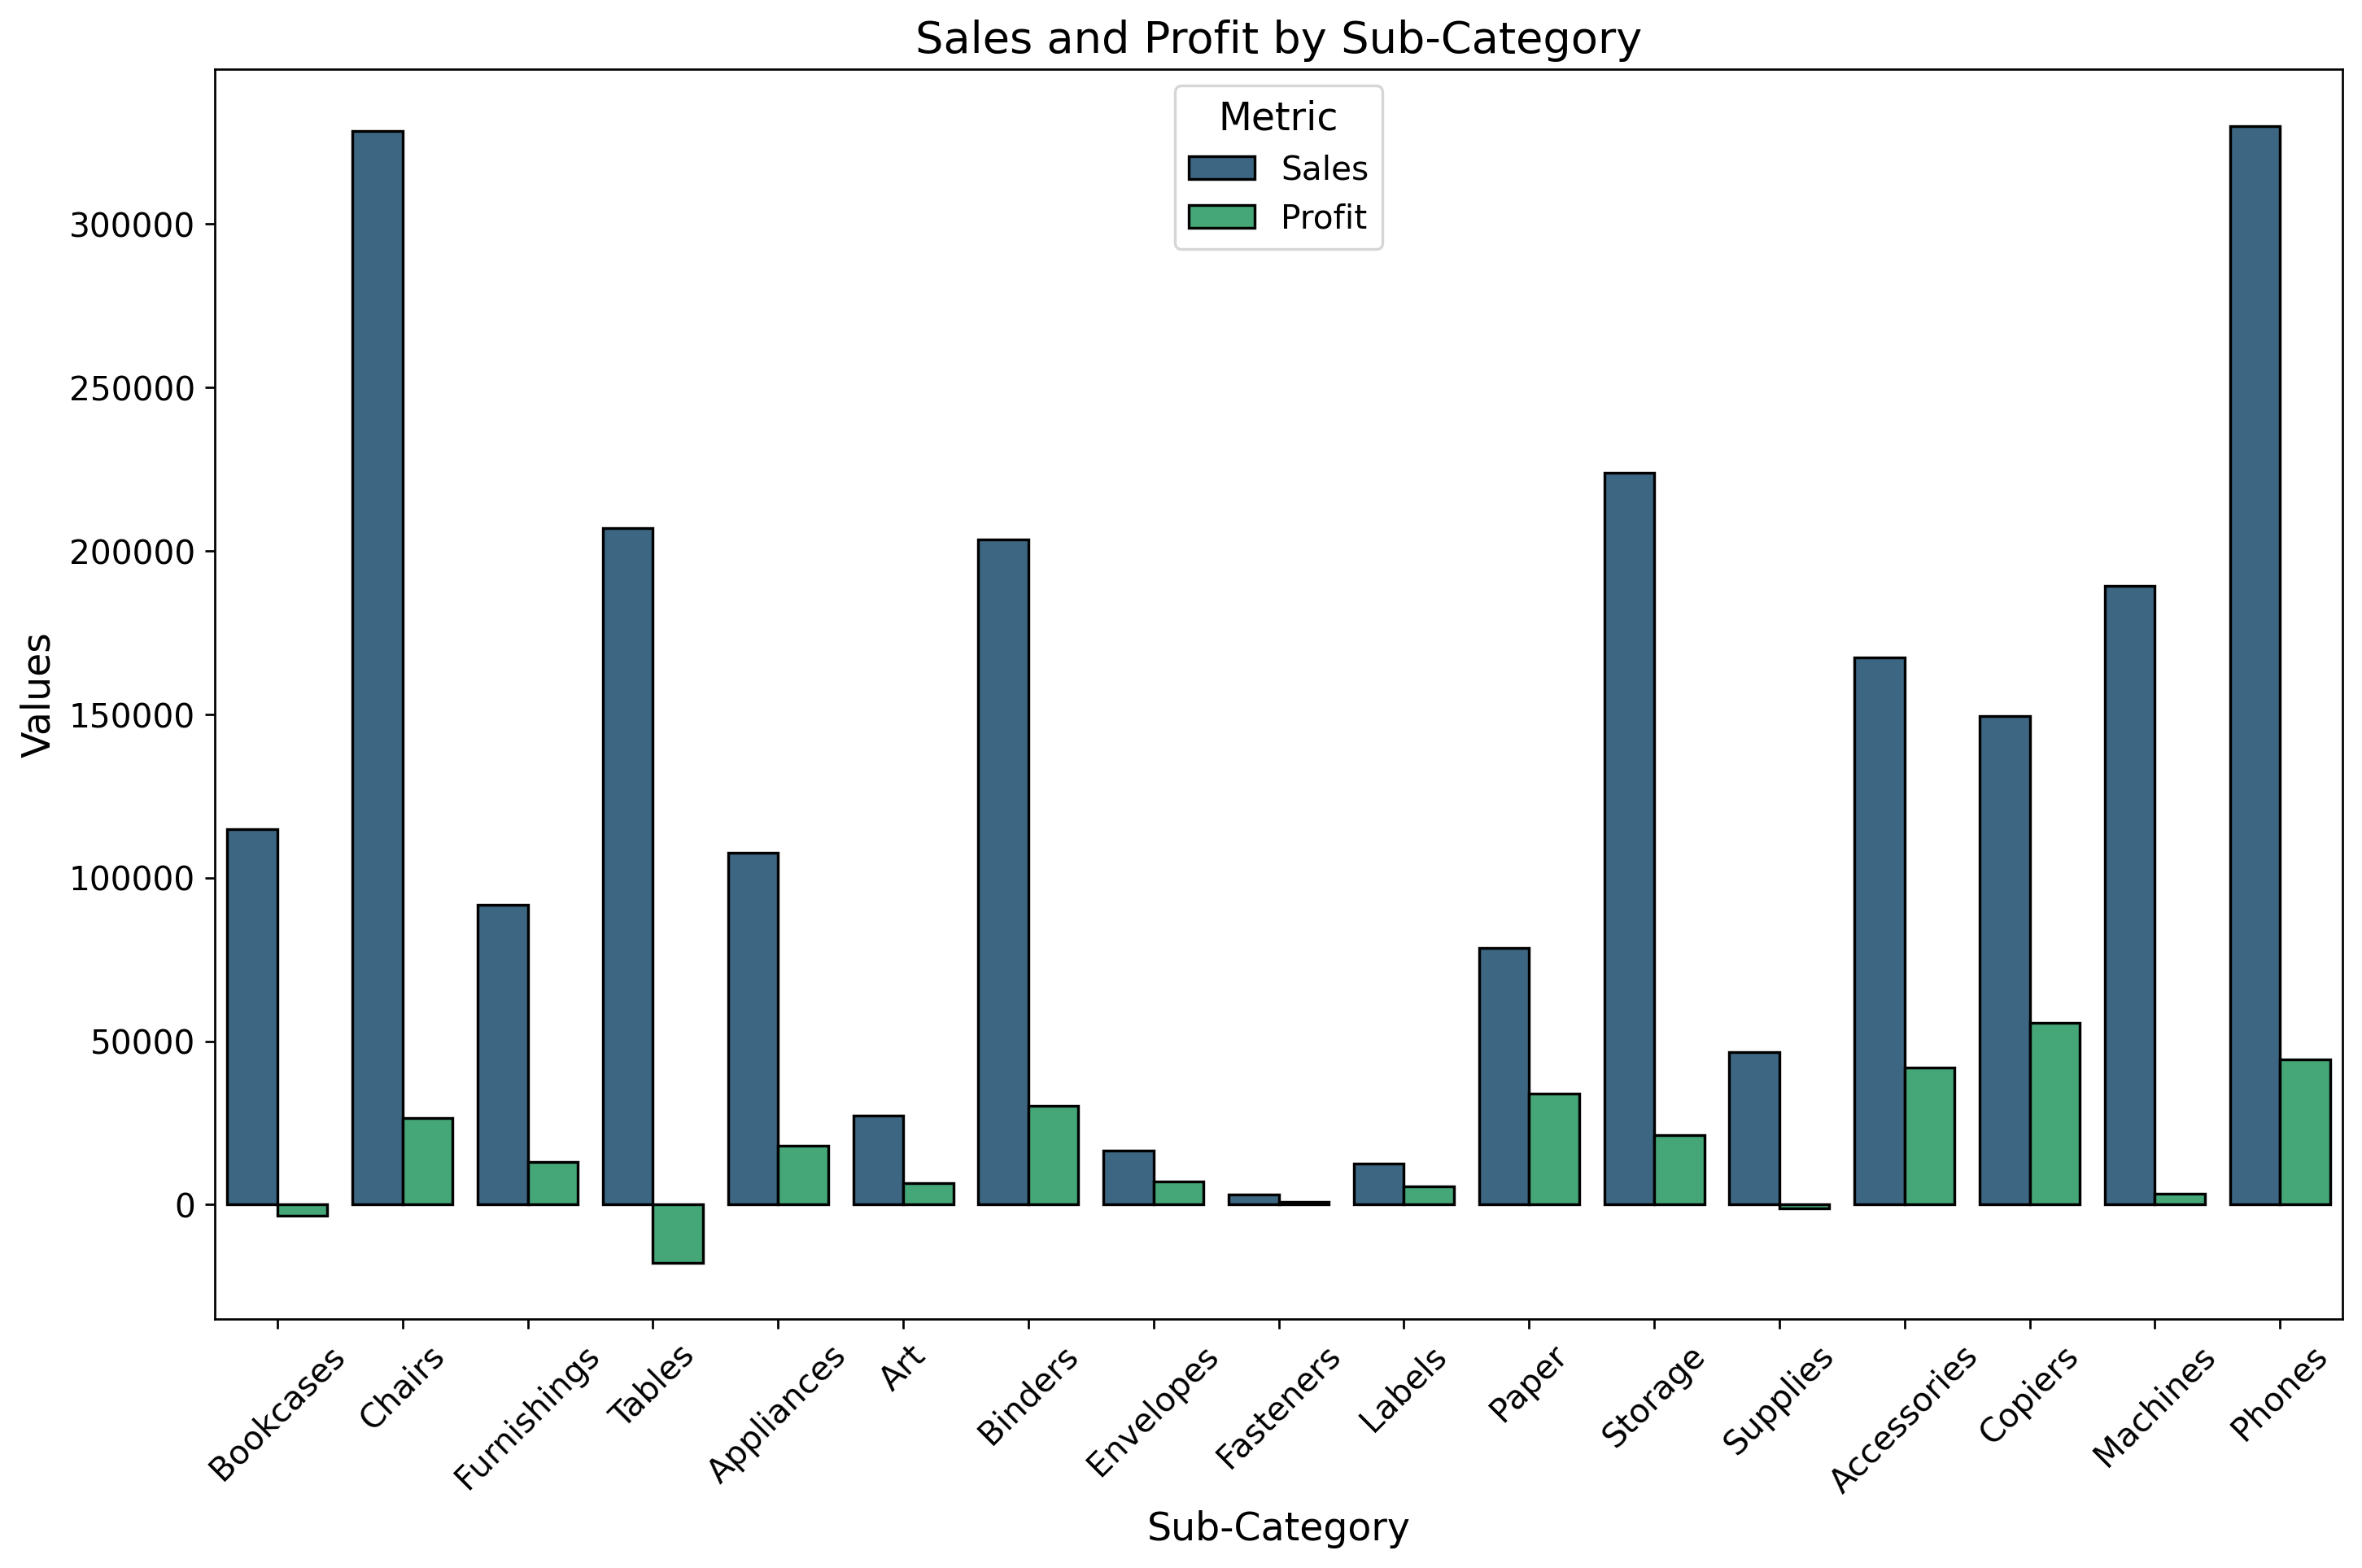

In [45]:
# calling the function
plot_grouped_sales_and_profit(melted_data)

In [24]:
def Pie_sales_Region(data):
    """
    Plots a pie chart of sales grouped by region.
    Parameters: data (DataFrame): A pandas DataFrame containing at least two columns:'Region' (categorical) and 'Sales' (numerical).
    """
    # Group the data by 'Region' and sum the 'Sales'
    grouped_data = data.groupby('Region')['Sales'].sum()
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    grouped_data.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)
    
    # Customize chart appearance
    plt.title('Sales Distribution by Region', fontsize=14)
    plt.ylabel('')  # Remove y-axis label for better visualization
    plt.show()

## 4.Pie Chart

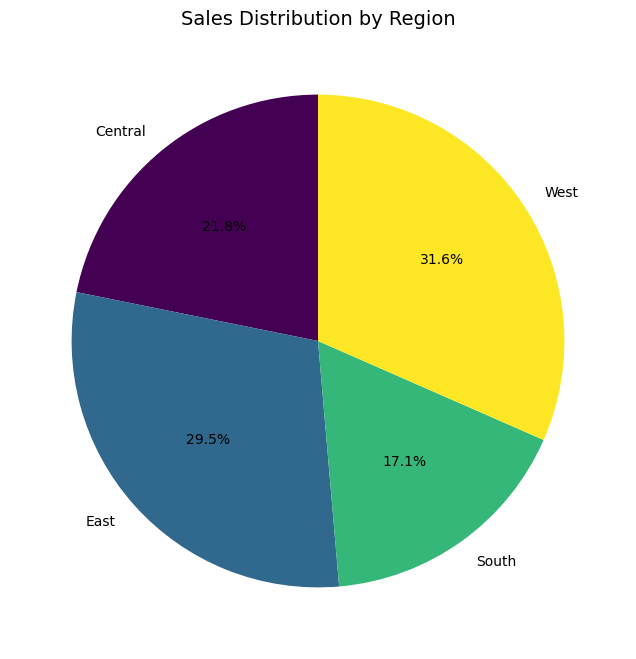

In [25]:
Pie_sales_Region(data)

In [56]:
# Preparing data for clustering
df_clust = data[['Profit', 'Sales']].copy()   # Create a DataFrame with only 'Profit' and 'Sales' columns for clustering.
# Initialize a RobustScaler to normalize the data while being robust to outliers.
scaler = RobustScaler()
# Apply the scaler to the selected columns and transform the data.
norm = scaler.fit_transform(df_clust)  # 'norm' is now a NumPy array with scaled 'Profit' and 'Sales' values.

In [60]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method to determine the optimal number of clusters (k).
    Parameters:
    - min_k (int): Minimum number of clusters (inclusive).
    - max_k (int): Maximum number of clusters (inclusive).
    - wcss (list or array): Within-cluster sum of squares for each k.
    - best_n (int): The optimal number of clusters determined.
    """
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot the WCSS values
    k_values = range(min_k, max_k + 1)
    ax.plot(k_values, wcss, 'bo-', label='WCSS', markersize=8, linewidth=2)
    
    # Highlight the best k
    ax.scatter(best_n, wcss[best_n - min_k], color='red', edgecolor='black', s=100, zorder=5, label=f'Best k = {best_n}')
    ax.annotate(
        f'k={best_n}',
        xy=(best_n, wcss[best_n - min_k]),
        xytext=(best_n, wcss[best_n - min_k] + (max(wcss) - min(wcss)) * 0.05),
        fontsize=12,
        color='red',
        ha='center',
        arrowprops=dict(facecolor='red', arrowstyle='->', lw=2)
    )
    
    # Customize axes and labels
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Method for Optimal k', fontsize=16)
    ax.set_xticks(k_values)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Legend
    ax.legend(fontsize=12)
    
    # Tight layout and display
    plt.tight_layout()
    plt.show()


In [62]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [64]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.97
 3 clusters silhoutte score = 0.96
 4 clusters silhoutte score = 0.91
 5 clusters silhoutte score = 0.82
 6 clusters silhoutte score = 0.83
 7 clusters silhoutte score = 0.76
 8 clusters silhoutte score = 0.77
 9 clusters silhoutte score = 0.77
10 clusters silhoutte score = 0.77
Best number of clusters =  2


## 5.Elbow Plot

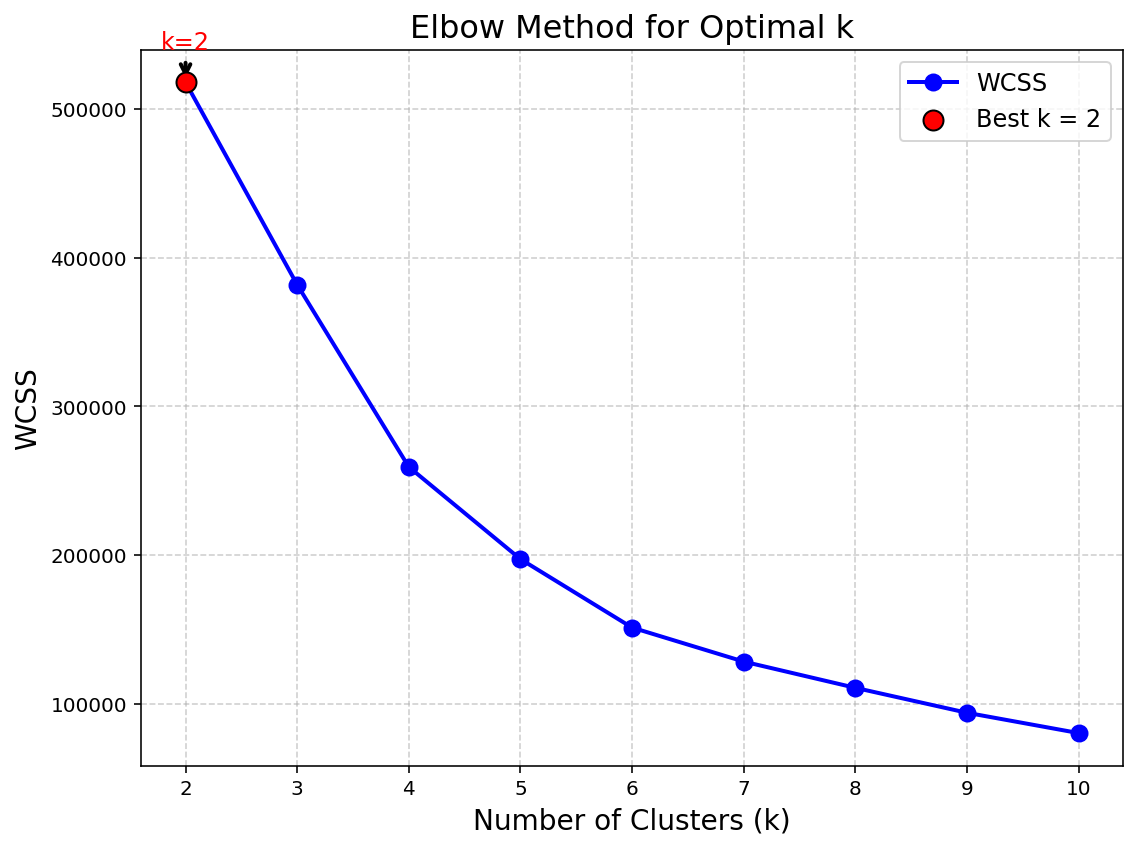

In [65]:
plot_elbow_method(2, 10, wcss, best_n)

In [75]:
def plot_clusters(labels, data, centers, x_centers, y_centers, center_labels, k):
    """
    Plots the results of K-Means clustering, including data points, cluster centers, and their labels.
    Parameters: labels (ndarray): Cluster labels for each data point.
        data (ndarray): Original (inverse-transformed) dataset.
        centers (ndarray): Cluster center coordinates (inverse-transformed).
        x_centers (ndarray): x-coordinates of cluster centers.
        y_centers (ndarray): y-coordinates of cluster centers.
        center_labels (ndarray): Labels of the cluster centers.
        k (int): Number of clusters (k) used in the K-Means algorithm.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot data points with cluster colors
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    
    # Highlight cluster centers
    plt.scatter(x_centers, y_centers, c='red', s=200, label='Cluster Centers', edgecolors='black')
    
    # Add cluster labels for centers
    for i, (x, y) in enumerate(zip(x_centers, y_centers)):
        plt.text(x, y, f'Center {center_labels[i]}', color='black', fontsize=9, ha='center', va='center')
    
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Profit')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [77]:
def perform_kmeans(data, norm_data, scaler, k_range):
    """
    Performs K-Means clustering for a range of cluster numbers and visualizes the results.
    Parameters: data (ndarray): Original (inverse-transformed) dataset for plotting.
        norm_data (ndarray): Normalized dataset used for K-Means clustering.
        scaler (MinMaxScaler): Fitted scaler used to normalize the dataset.
        k_range (iterable): Range of `k` values (number of clusters) to evaluate.
    """
    for k in k_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(norm_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = cluster_centers[:, 0]
        y_centers = cluster_centers[:, 1]
        center_labels = kmeans.predict(kmeans.cluster_centers_)
        
        # Plot the results for the current k value
        plot_clusters(labels, data, cluster_centers, x_centers, y_centers, center_labels, k)

## 6.Scatter Plot / Clustering

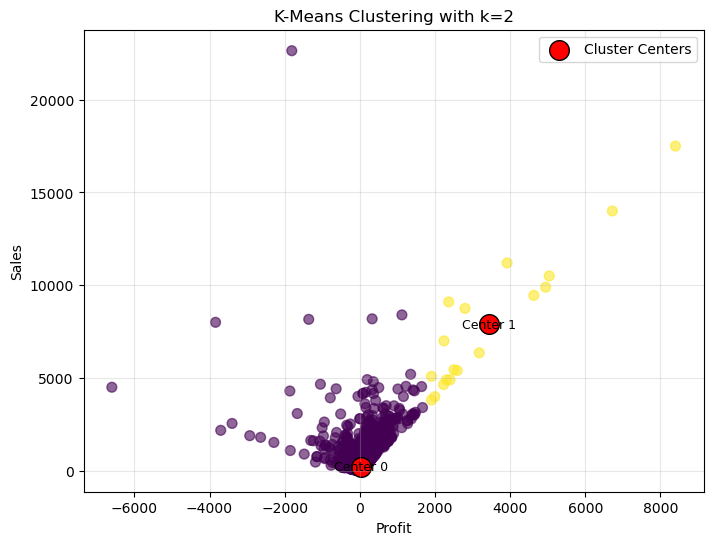

In [83]:
inv_norm = scaler.inverse_transform(norm)  # Important for accurate plotting of original data

# Perform KMeans for k values in the range 2
perform_kmeans(inv_norm, norm, scaler, k_range=range(2, 3))